In [37]:
import numpy as np
import matplotlib.pyplot as plt
from obspy.core import read, Stream
import pandas as pd

In [38]:
path = '/Users/sydneydybing/SW4/strain/M7_RC-results/'
stas = ['B072', 'B079', 'B082', 'B087', 'B916', 'B917', 'B918', 'B921']
test_stas = ['B917']

hoz_only = True

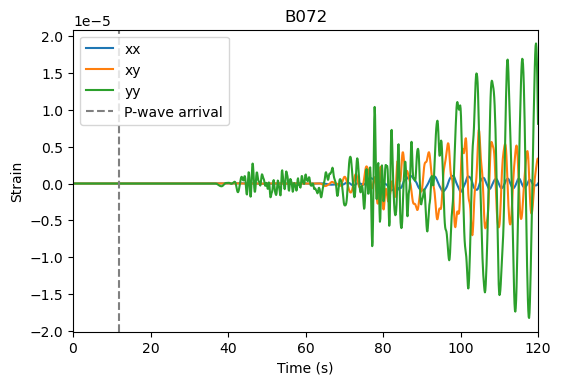

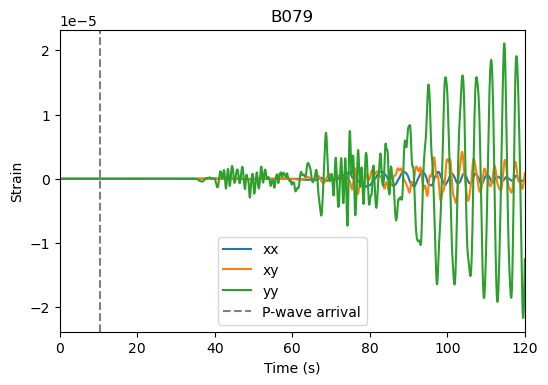

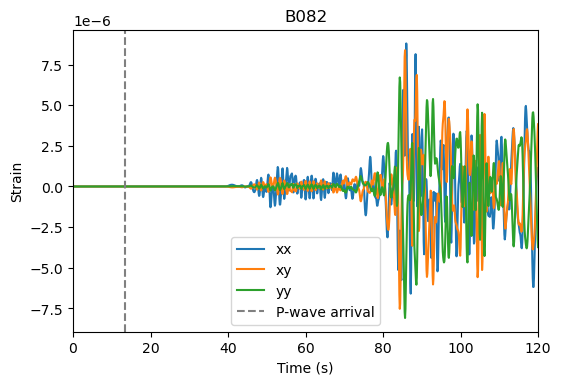

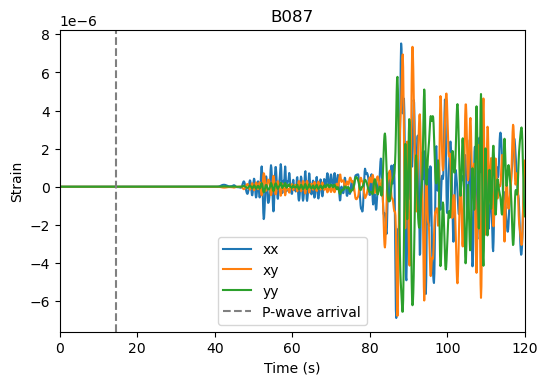

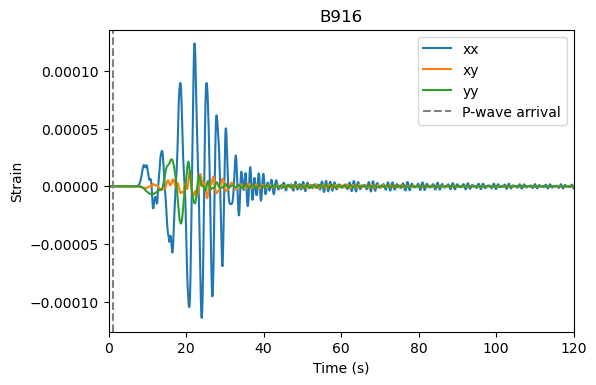

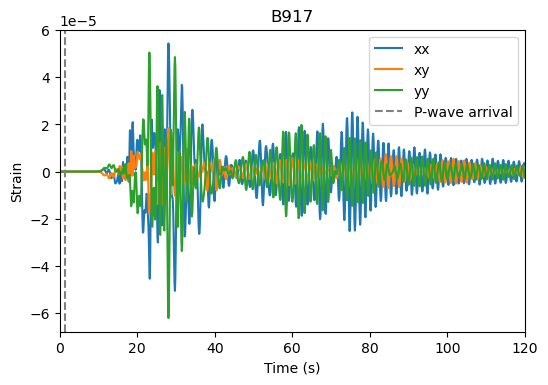

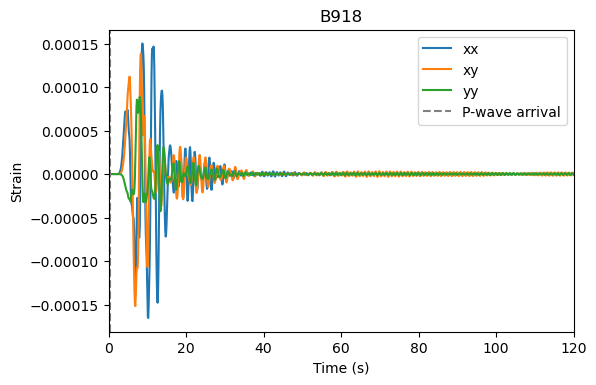

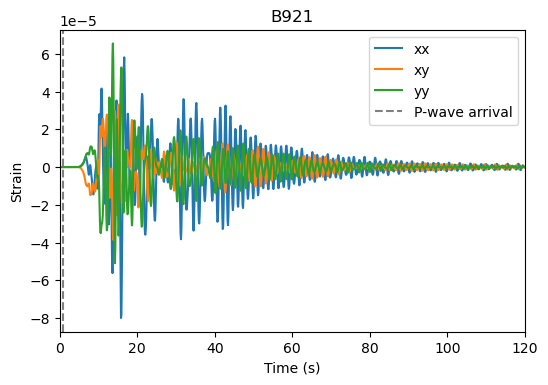

In [46]:
for sta in stas:
    
    data = pd.read_csv(path + sta + '.txt', sep = '\s+', skiprows = 16, names = ['time', 'xx', 'yy', 'zz', 'xy', 'xz', 'yz'])
    
    if hoz_only:
        xx = data.xx.values
        xy = data.xy.values
        yy = data.yy.values
        
        rms = np.sqrt((xx**2 + xy**2 + yy**2)/3)
    
    else:
        xx = data.xx.values
        xy = data.xy.values
        xz = data.xz.values
        yy = data.yy.values
        yz = data.yz.values
        zz = data.zz.values
    
        rms = np.sqrt((xx**2 + xy**2 + xz**2 + yy**2 + yz**2 + zz**2)/6)
    
    try:
        i = np.where(rms > 0)[0]
        p_arr_idx = i[0]
    except: 
        print(sta + ': no data yet')
        continue # skips to next station if all the data at this station is zeros
    
    rms_data = rms
    rms_times = data.time.values
    
    mod_rms_data = rms_data.copy()
    mod_rms_times = rms_times.copy()
    
    p_arr_strain = rms_data[p_arr_idx]
    
    mod_rms_data[:p_arr_idx] = p_arr_strain
    
    pst_data = mod_rms_data.copy()
    pst_times = mod_rms_times.copy()
    
    # Loop over samples
    for k in range(0,len(mod_rms_data)): #avoid starting at zero

        if k == 0:
            strain = mod_rms_data[0]
            max_strain = strain

        else:
            # Grab progressively longer windows and save the biggest strain
            strain = mod_rms_data[:k+1] # Has to be k+1 because slicing doesn't include last one
            max_strain = max(strain)

        # Put peak strain back into the output stream
        pst_data[k] = max_strain 
    
    plt.figure(dpi = 100)
    plt.title(sta)
    plt.plot(data.time.values, xx, label = 'xx')
    plt.plot(data.time.values, xy, label = 'xy')
    plt.plot(data.time.values, yy, label = 'yy')
#     plt.plot(rms_times, rms_data, color = 'green', label = 'RMS strain')
#     plt.plot(mod_rms_times, mod_rms_data, color = 'blue', label = 'RMS strain')
#     plt.plot(pst_times, pst_data, color = 'red', label = 'Peak strain')
#     plt.semilogy()
    plt.axvline(rms_times[i[0]], color = 'gray', linestyle = '--', label = 'P-wave arrival')
    plt.xlabel('Time (s)')
    plt.ylabel('Strain')
    plt.xlim(0,max(rms_times))
#     plt.ylim(10**-15, 10**-3)
    plt.legend()
    plt.show()
